<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [EXPLORATORY DATA ANALYSIS (EDA) on TITANIC DATASET](#1)
* [READING & UNDERSTANDING THE DATA](#2)
* [THE DETAILED EXAMINATION OF DATA](#3)    
* [SOME FEATURE ENGINEERING](#4)
* [DROPPING UNNECESSARY FEATURES](#5)
* [DUMMY OPERATION](#6)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings                                               # -
# warnings.filterwarnings("ignore")                             # - uyarilari görmemek icin
# warnings.warn("this will not show")                           # -

plt.rcParams["figure.figsize"] = (10,6)                         # figsize standart olsun

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)     # %.3f => .'dan sonra kac sayi gelsin

# Set it None to display all rows in the dataframe              # ciktida görmek istedigim rows sayisi             
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)                      # ciktida görmek istedigim column sayisi 

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Exploratory Data Analysis (EDA) on Titanic Dataset</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

# Ziel

Applying Exploratory Data Analysis (EDA) und Aufbereitung der Daten zur Implementierung der Algorithmen für maschinelles Lernen
1. Analyse der Merkmale nach Überlebensstatus (Zielmerkmal)
2. Daten vorbereiten, um ein Modell zu erstellen, das den Überlebensstatus von Menschen vorhersagt (das Merkmal „Überleben“ ist also das Zielmerkmal)

### Informationen zu den Spalten

#### Erläuterungen zu Daten


<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Daten lesen & verstehen</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## Lassen wir uns die Daten aus der Datei lesen

In [2]:
df = pd.read_csv("titanic.csv", sep="\t")

## Lassen wir uns die Daten verstehen

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [4]:
df.shape

(156, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

In [7]:
df.isnull().sum()/df.shape[0] * 100

PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
Age           19.231
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
Cabin         80.128
Embarked       0.641
dtype: float64

Ungefähr 20 Prozent der Age-Daten und 80 Prozent der Cabin-Daten fehlen.

Nur 1 Person an Bord hat keine Informationen darüber, wo er/sie auf das Schiff gekommen ist.

Diese eine Reihe kann weggelassen werden.

Die folgende Heatmap zeigt die Verteilung der fehlenden Daten innerhalb aller Daten.

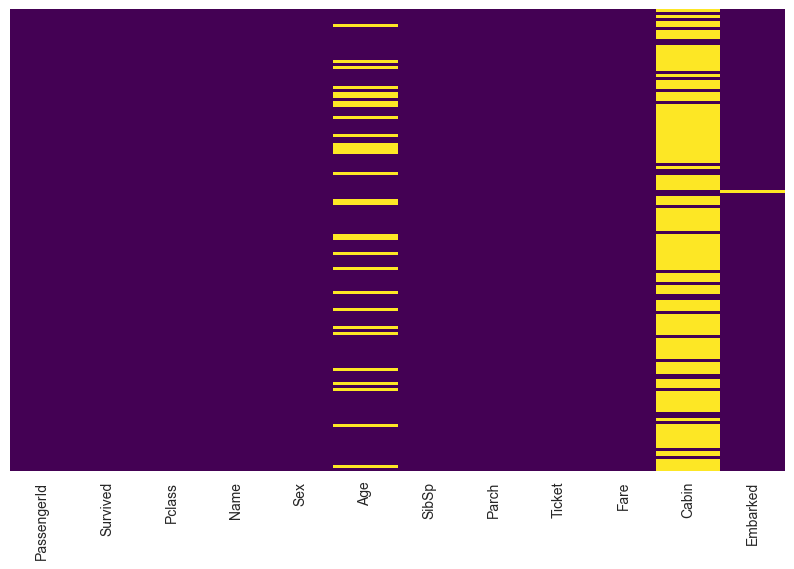

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');  # missing value'lari görsellestirdim

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,156.000,78.500,45.177,1.000,39.750,78.500,117.250,156.000
Survived,156.000,0.346,0.477,0.000,0.000,0.000,1.000,1.000
Pclass,156.000,2.423,0.795,1.000,2.000,3.000,3.000,3.000
Age,126.000,28.142,14.614,0.830,19.000,26.000,35.000,71.000
SibSp,156.000,0.615,1.056,0.000,0.000,0.000,1.000,5.000
Parch,156.000,0.397,0.870,0.000,0.000,0.000,0.000,5.000
Fare,156.000,28.110,39.401,6.750,8.003,14.454,30.372,263.000


In [10]:
df.describe(include = "O").T 

,count,unique,top,freq
Name,156,156,"Braund, Mr. Owen Harris",1
Sex,156,2,male,100
Ticket,156,145,2651,2
Cabin,31,28,C23 C25 C27,2
Embarked,155,3,S,110


In [11]:
object_col = df.select_dtypes(include='object').columns
object_col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [14]:
for col in object_col:  # her column'u döngü icinde gördüm
    print(col)
    print("--"*10)
    print(df[col].value_counts(dropna=False))
    print("--"*28)

Name
--------------------
Braund, Mr. Owen Harris                               1
Moss, Mr. Albert Johan                                1
Petranec, Miss. Matilda                               1
Petroff, Mr. Pastcho ("Pentcho")                      1
White, Mr. Richard Frasar                             1
                                                     ..
Harper, Mrs. Henry Sleeper (Myna Haxtun)              1
Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)    1
Ostby, Mr. Engelhart Cornelius                        1
Woolner, Mr. Hugh                                     1
Williams, Mr. Charles Duane                           1
Name: Name, Length: 156, dtype: int64
--------------------------------------------------------
Sex
--------------------
male      100
female     56
Name: Sex, dtype: int64
--------------------------------------------------------
Ticket
--------------------
2651               2
237736             2
35281              2
19950              2
CA 2144          

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Die detaillierte Prüfung der Daten Spalte für Spalte</p>

## Age

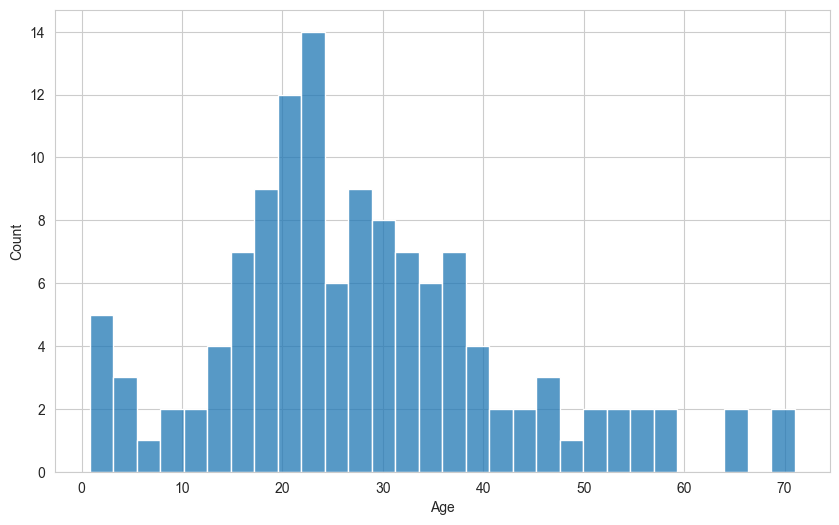

In [15]:
sns.histplot(data=df, x='Age', kde=False, bins=30);

In [16]:
mean = df.Age.mean()

In [17]:
median = df.Age.median()

In [18]:
#print('Age mean:{}\nAge median:{}'.format(mean, median))
print(f'Age mean:{mean}\nAge median:{median}')

Age mean:28.141507936507935
Age median:26.0


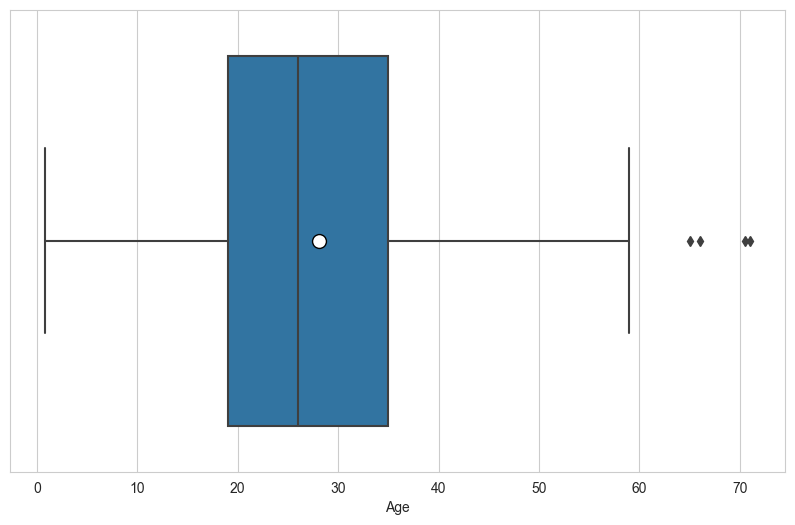

In [20]:
sns.boxplot(data=df,
            x='Age',
            showmeans=True,  # means görmek icin
            meanprops={'marker':'o', 
                      'markerfacecolor':'white',
                      'markeredgecolor':'black', 
                      'markersize':'10'
                     });

In [21]:
df.groupby('Pclass').Age.median()

Pclass
1   38.000
2   29.000
3   22.000
Name: Age, dtype: float64

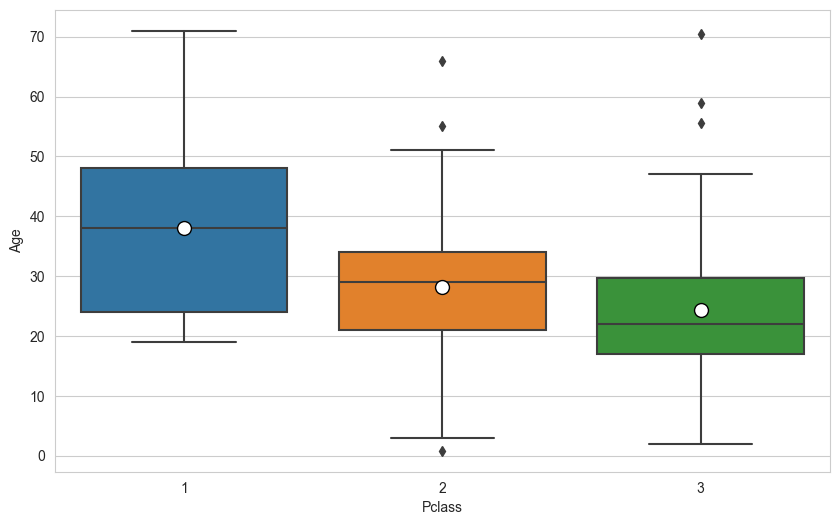

In [22]:
sns.boxplot(data=df, x='Pclass', y='Age', showmeans=True, meanprops={'marker':'o', 
                                                                     'markerfacecolor':'white',
                                                                     'markeredgecolor':'black', 
                                                                     'markersize':'10'});

Aus diesen Boxplots lässt sich ablesen, dass die älteren Menschen lieber in die erste Klasse gehen und mit abnehmender Klassenqualität das Durchschnittsalter sinkt. Finden wir diese Medianwerte.

In [23]:
df.groupby(['Pclass', 'Sex']).Age.median()

Pclass  Sex   
1       female   36.500
        male     40.000
2       female   28.000
        male     32.000
3       female   19.000
        male     24.000
Name: Age, dtype: float64

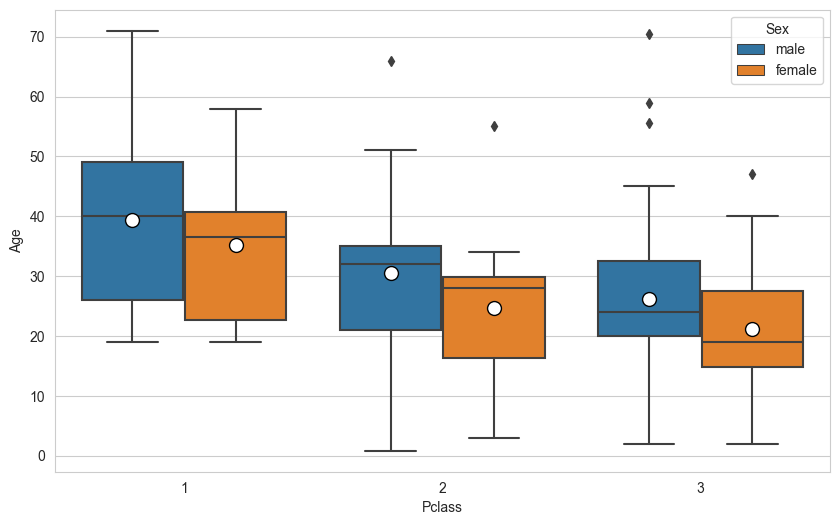

In [25]:
sns.boxplot(data=df, x='Pclass', y='Age', hue="Sex", showmeans=True , meanprops={'marker':'o', 
                                                                                  'markerfacecolor':'white',
                                                                                  'markeredgecolor':'black', 
                                                                                  'markersize':'10'});

Zusätzlich zur obigen Interpretation ist auch der Median des Alters der Männer in jeder Klassenqualität höher als der der Frauen. Finden wir diese Medianwerte.

In [26]:
df.groupby(['Pclass', 'Sex']).Age.transform("median")

0     24.000
1     36.500
2     19.000
3     36.500
4     24.000
       ...  
151   36.500
152   24.000
153   24.000
154   24.000
155   40.000
Name: Age, Length: 156, dtype: float64

In [27]:
df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Sex']).Age.transform("median"))

In [28]:
df.isnull().sum()  # Ich habe die fehlenden Werte im Alter ausgefüllt

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

## Cabin

#### 80 Prozent der Cabin-Daten fehlen. Ich kann diese fehlenden Werte nicht genau genug füllen. Also lasse ich diese Spalte fallen.

In [29]:
df.drop('Cabin', axis = 1, inplace= True)  

## Embarked

#### Es gibt nur 1 fehlenden Wert in der Spalte Einschiffung und ich kann diesen fehlenden Wert nicht genau genug ausfüllen. Lassen ich mich also nur diese Reihe fallen.

In [30]:
df.dropna(inplace = True) 

In [31]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Survive (target feature)

In [32]:
df.Survived.value_counts(normalize=True)  # überleben

0   0.658
1   0.342
Name: Survived, dtype: float64

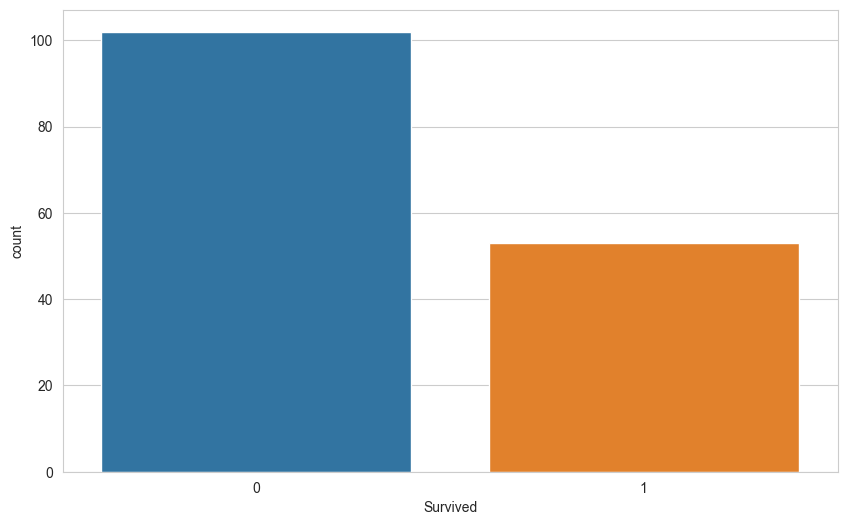

In [33]:
sns.countplot(data=df, x='Survived');  

### Lasse ich mir die Wirkung jedes Merkmals auf den Überlebensstatus untersuchen

### Sex

In [34]:
df.groupby("Sex").Survived.value_counts() 

Sex     Survived
female  1           39
        0           16
male    0           86
        1           14
Name: Survived, dtype: int64

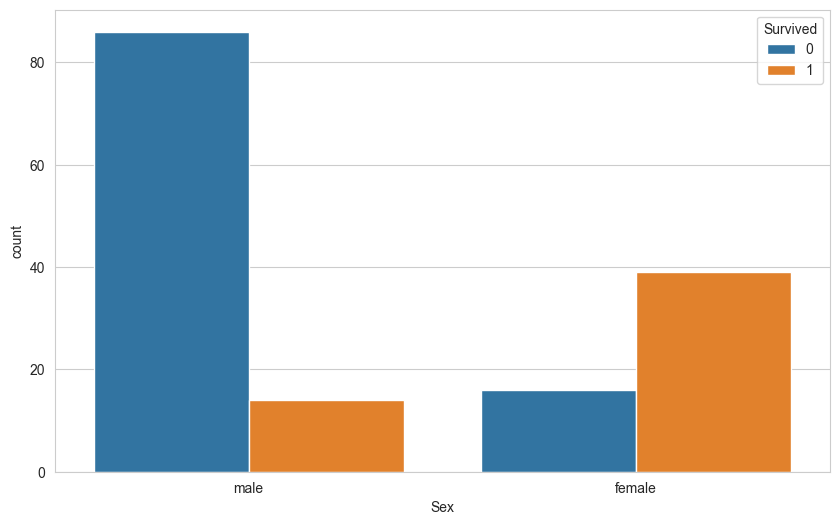

In [35]:
sns.countplot(data=df, x='Sex', hue='Survived');

In [39]:
df.groupby("Sex").Survived.value_counts(normalize=True) 

Sex     Survived
female  1          0.709
        0          0.291
male    0          0.860
        1          0.140
Name: Survived, dtype: float64

### Pclass

#### Die meisten Passagiere der 3. Klasse an Bord starben.

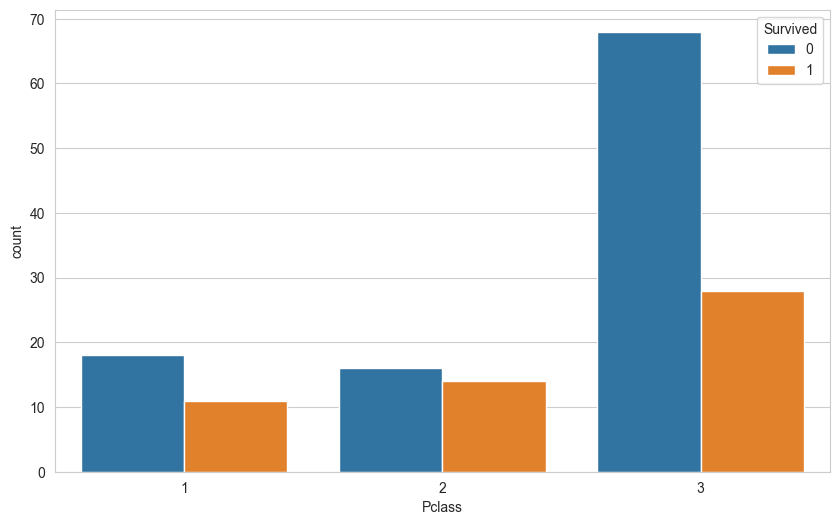

In [43]:
sns.countplot(data=df, x='Pclass', hue='Survived');

### SibSp

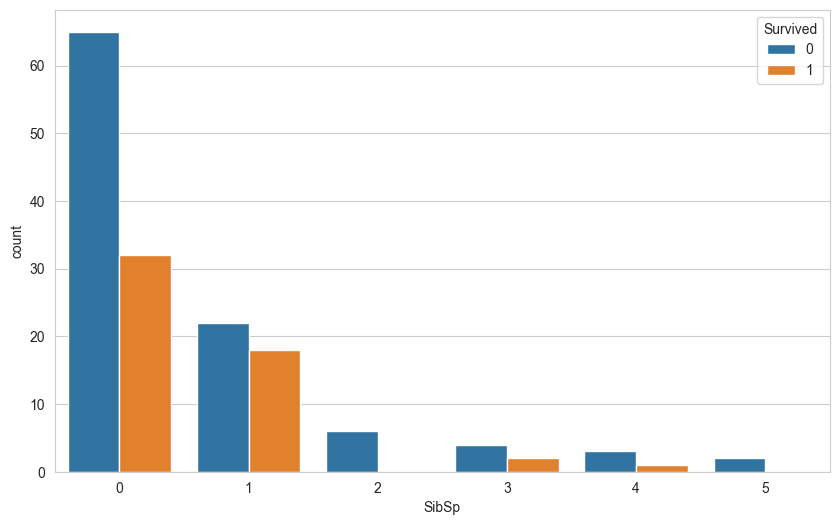

In [44]:
sns.countplot(data=df, x='SibSp', hue='Survived');

### Parch

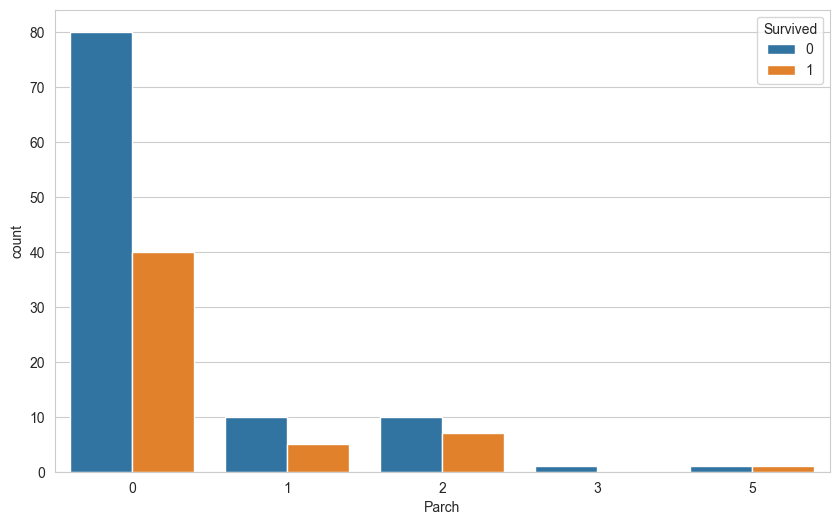

In [45]:
sns.countplot(data=df, x='Parch', hue='Survived');

### Embarked

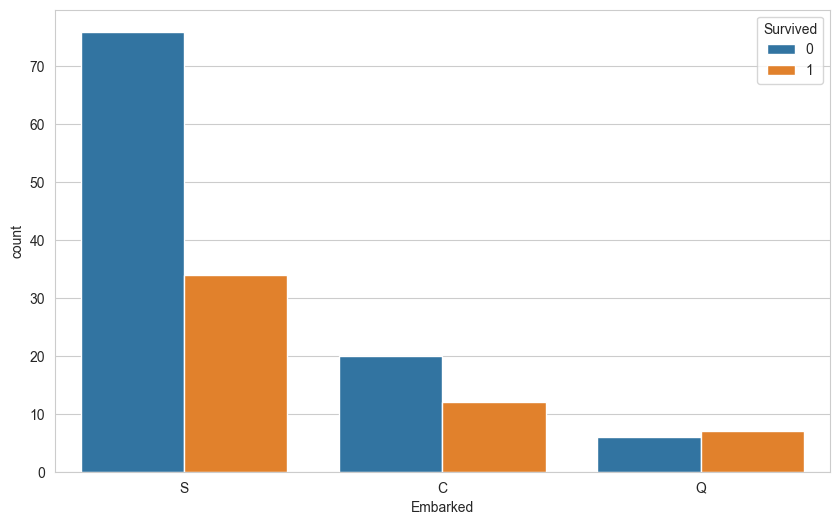

In [46]:
sns.countplot(data=df, x='Embarked', hue='Survived');

### Age

In [47]:
df.groupby("Survived").Age.median()

Survived
0   24.000
1   24.000
Name: Age, dtype: float64

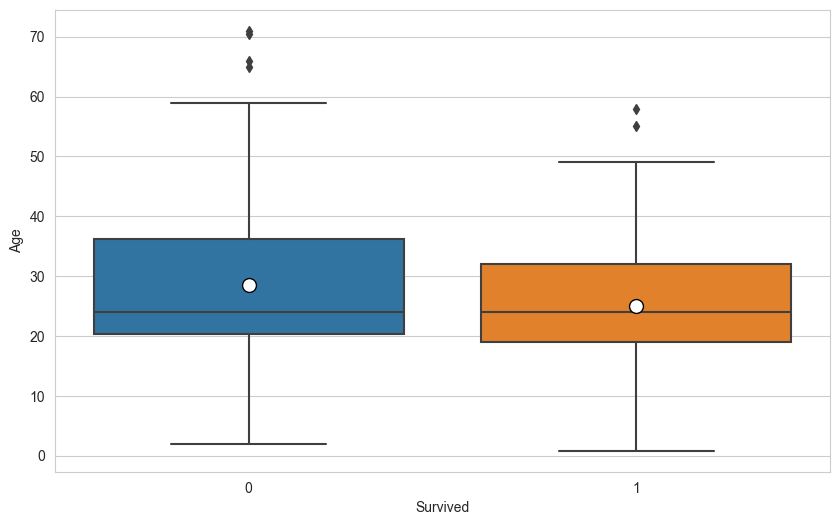

In [48]:
sns.boxplot(data = df, x = "Survived", y = "Age", showmeans=True, meanprops={'marker':'o', 
                                                                             'markerfacecolor':'white',
                                                                             'markeredgecolor':'black', 
                                                                             'markersize':'10'});

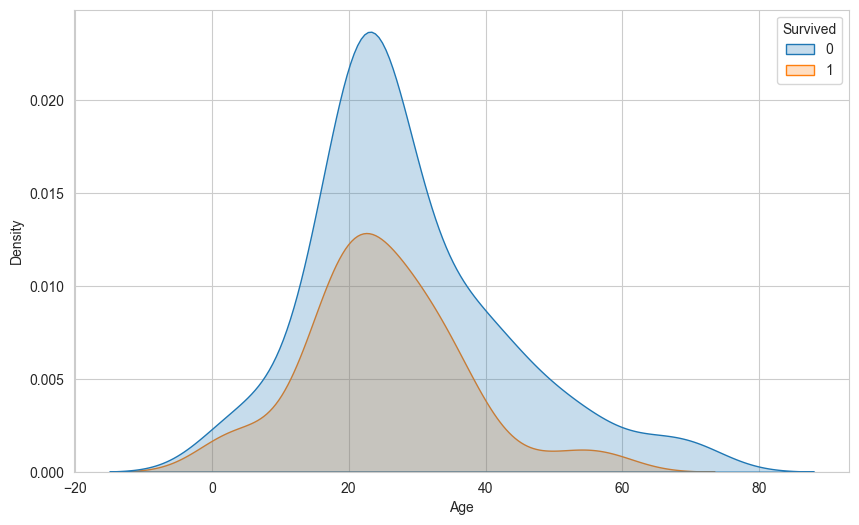

In [49]:
sns.kdeplot(data = df, x = "Age", hue = "Survived", fill=True);

### Fare

In [51]:
df.groupby("Survived").Fare.median()

Survived
0   13.727
1   15.246
Name: Fare, dtype: float64

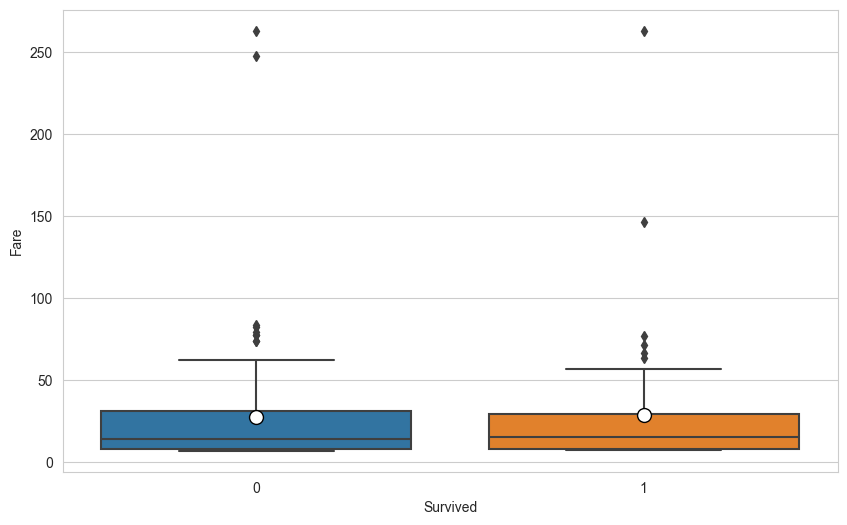

In [52]:
sns.boxplot(data = df, x = "Survived", y = "Fare", showmeans=True, meanprops={'marker':'o', 
                                                                             'markerfacecolor':'white',
                                                                             'markeredgecolor':'black', 
                                                                             'markersize':'10'});

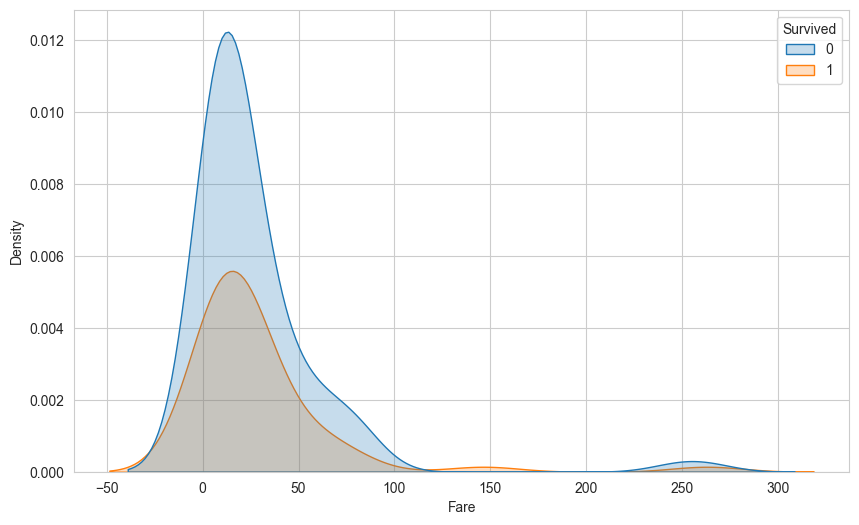

In [53]:
sns.kdeplot(data = df, x = "Fare", hue = "Survived", fill=True);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Some Feature Engineering</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### From "Ticket" to "is_group"

In [54]:
ticket = df.Ticket.value_counts()
ticket

2651               2
W./C. 6608         2
35281              2
19950              2
CA 2144            2
                  ..
14311              1
370371             1
S.C./A.4. 23567    1
330958             1
PC 17597           1
Name: Ticket, Length: 144, dtype: int64

In [55]:
ticket[ticket != 1]

2651            2
W./C. 6608      2
35281           2
19950           2
CA 2144         2
347082          2
S.O.C. 14879    2
237736          2
11668           2
349909          2
113803          2
Name: Ticket, dtype: int64

In [56]:
group_list = list(ticket[ticket != 1].index)
group_list

['2651',
 'W./C. 6608',
 '35281',
 '19950',
 'CA 2144',
 '347082',
 'S.O.C. 14879',
 '237736',
 '11668',
 '349909',
 '113803']

In [57]:
df["is_group"] = df.Ticket.isin(group_list) * 1  # * 1, sayisallastirdi. yoksa False, True dönüyor
df.is_group

0      0
1      0
2      0
3      1
4      0
      ..
151    0
152    0
153    0
154    0
155    0
Name: is_group, Length: 155, dtype: int32

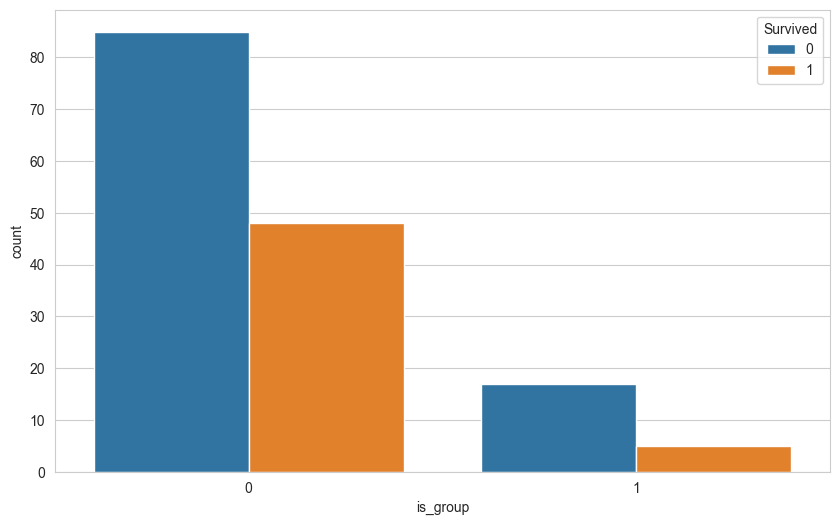

In [58]:
sns.countplot(data=df, x='is_group', hue='Survived');

### From "SibSp" and "Parch" to "is_alone"

In [59]:
df["is_alone"] = ((df.SibSp == 0) & (df.Parch == 0)) * 1
df.is_alone

0      0
1      0
2      1
3      0
4      1
      ..
151    0
152    1
153    0
154    1
155    0
Name: is_alone, Length: 155, dtype: int32

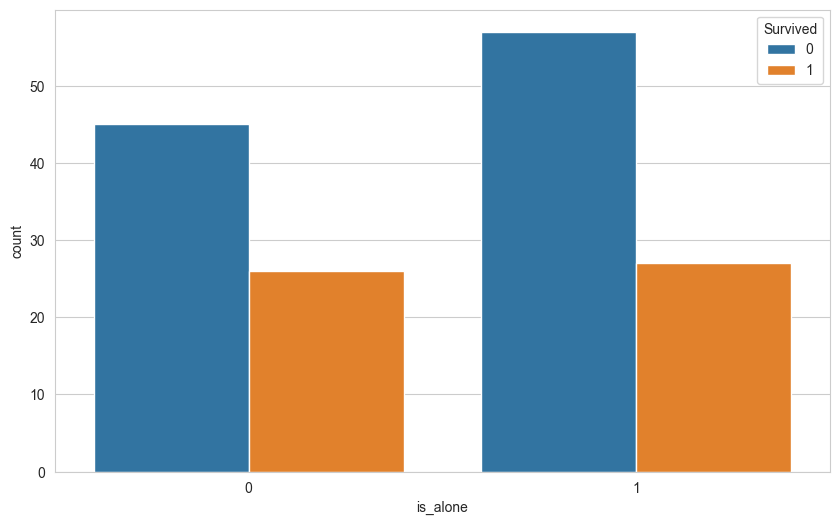

In [60]:
sns.countplot(data=df, x='is_alone', hue='Survived');

[Text(0, 0, '45'), Text(0, 0, '57')]

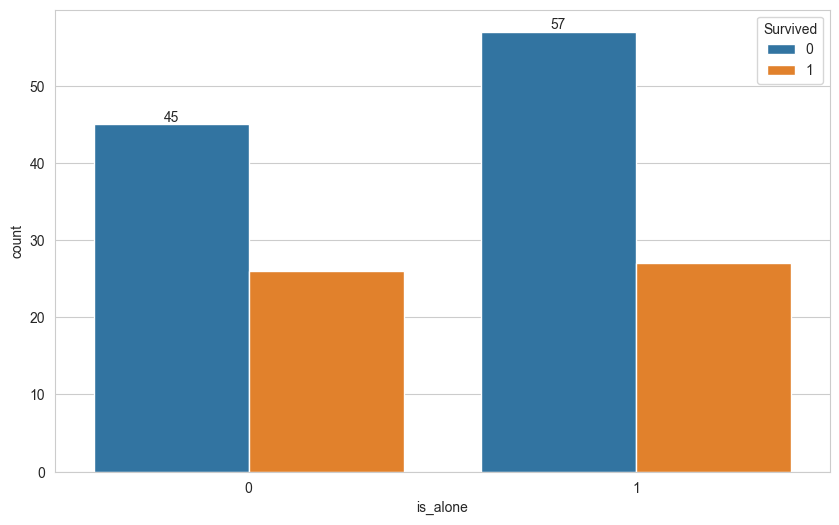

In [61]:
ax = sns.countplot(data=df, x='is_alone', hue='Survived')
ax.bar_label(ax.containers[0])  # sayilari grafiklerin üzerine yazdirdi

**Sehe ich mir die Beziehung zwischen den Features „is_group“ und „is_alone“ an.**

In [62]:
df.groupby("is_group").is_alone.value_counts()

is_group  is_alone
0         1           83
          0           50
1         0           21
          1            1
Name: is_alone, dtype: int64

## Lasse ich mir einige nützliche Methoden für die Funktionen "Name" und "Ticket" implementieren

### Name

In [63]:
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
151                    Pears, Mrs. Thomas (Edith Wearne)
152                                     Meo, Mr. Alfonzo
153                      van Billiard, Mr. Austin Blyler
154                                Olsen, Mr. Ole Martin
155                          Williams, Mr. Charles Duane
Name: Name, Length: 155, dtype: object

In [64]:
df.Name.sample(10)

58                          West, Miss. Constance Mirium
139                                   Giglio, Mr. Victor
15                      Hewlett, Mrs. (Mary D Kingcome) 
59                    Goodwin, Master. William Frederick
141                             Nysten, Miss. Anna Sofia
77                              Moutal, Mr. Rahamin Haim
0                                Braund, Mr. Owen Harris
146         Andersson, Mr. August Edvard ("Wennerstrom")
47                             O'Driscoll, Miss. Bridget
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
Name: Name, dtype: object

In [65]:
df.Name.str.extract("\w+\.\s(\w*\s*\w*)") 

,0
0,Owen Harris
1,John Bradley
2,Laina
3,Jacques Heath
4,William Henry
...,...
151,Thomas
152,Alfonzo
153,Austin Blyler
154,Ole Martin


In [66]:
df["Name"] = df.Name.str.extract("\w+\.\s(\w*\s*\w*)")

### Ticket

In [67]:
df.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
151              113776
152          A.5. 11206
153            A/5. 851
154           Fa 265302
155            PC 17597
Name: Ticket, Length: 155, dtype: object

In [68]:
df.Ticket.str.extract("(\d*)$")

,0
0,21171
1,17599
2,3101282
3,113803
4,373450
...,...
151,113776
152,11206
153,851
154,265302


In [69]:
df["Ticket"] = df.Ticket.str.extract("(\d*)$")

In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group,is_alone
0,1,0,3,Owen Harris,male,22.000,1,0,21171,7.250,S,0,0
1,2,1,1,John Bradley,female,38.000,1,0,17599,71.283,C,0,0
2,3,1,3,Laina,female,26.000,0,0,3101282,7.925,S,0,1
3,4,1,1,Jacques Heath,female,35.000,1,0,113803,53.100,S,1,0
4,5,0,3,William Henry,male,35.000,0,0,373450,8.050,S,0,1


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Weglassen unnötiger Funktionen</p>

In [71]:
df_final = df.drop(['PassengerId', 'Name' , 'Ticket'], axis=1)
df_final 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_group,is_alone
0,0,3,male,22.000,1,0,7.250,S,0,0
1,1,1,female,38.000,1,0,71.283,C,0,0
2,1,3,female,26.000,0,0,7.925,S,0,1
3,1,1,female,35.000,1,0,53.100,S,1,0
4,0,3,male,35.000,0,0,8.050,S,0,1
...,...,...,...,...,...,...,...,...,...,...
151,1,1,female,22.000,1,0,66.600,S,0,0
152,0,3,male,55.500,0,0,8.050,S,0,1
153,0,3,male,40.500,0,2,14.500,S,0,0
154,0,3,male,24.000,0,0,7.312,S,0,1


In [72]:
df_final.corr()  # Zeigt Korrelationswerte zwischen Spalten an. Korrelation: die Beziehung zwischen zwei Variablen

,Survived,Pclass,Age,SibSp,Parch,Fare,is_group,is_alone
Survived,1.000,-0.102,-0.126,-0.062,0.044,0.018,-0.098,-0.047
Pclass,-0.102,1.000,-0.400,0.082,0.011,-0.602,-0.129,0.192
Age,-0.126,-0.400,1.000,-0.349,-0.194,0.060,-0.192,0.165
SibSp,-0.062,0.082,-0.349,1.000,0.398,0.279,0.462,-0.639
Parch,0.044,0.011,-0.194,0.398,1.000,0.260,0.323,-0.500
Fare,0.018,-0.602,0.060,0.279,0.260,1.000,0.337,-0.373
is_group,-0.098,-0.129,-0.192,0.462,0.323,0.337,1.000,-0.405
is_alone,-0.047,0.192,0.165,-0.639,-0.500,-0.373,-0.405,1.000


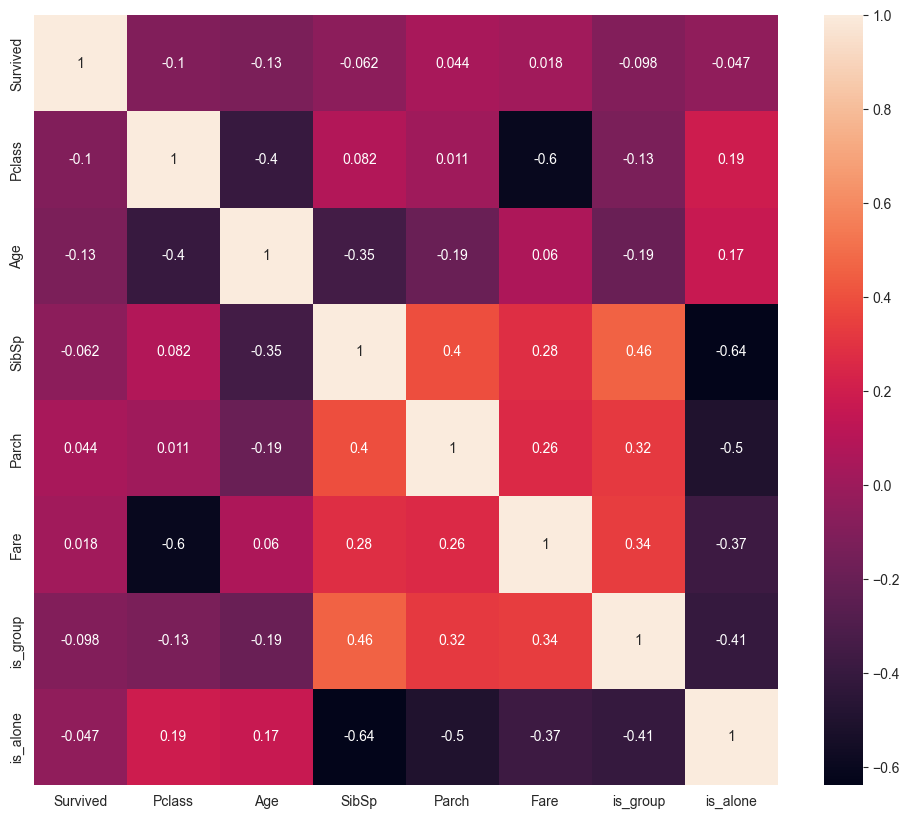

In [73]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_final.corr(), annot=True);

In [74]:
df_final = df_final.drop(['SibSp', 'Parch'], axis=1)  # bu sütunlara da gerek kalmadi
df_final

,Survived,Pclass,Sex,Age,Fare,Embarked,is_group,is_alone
0,0,3,male,22.000,7.250,S,0,0
1,1,1,female,38.000,71.283,C,0,0
2,1,3,female,26.000,7.925,S,0,1
3,1,1,female,35.000,53.100,S,1,0
4,0,3,male,35.000,8.050,S,0,1
...,...,...,...,...,...,...,...,...
151,1,1,female,22.000,66.600,S,0,0
152,0,3,male,55.500,8.050,S,0,1
153,0,3,male,40.500,14.500,S,0,0
154,0,3,male,24.000,7.312,S,0,1


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dummy Operation</p>

#### Kategoriale Daten sind ein Problem für maschinelles Lernen
#### Ich muss sie numerisch machen

In [81]:
df_dummy = pd.get_dummies(data = df_final, drop_first=True)
df_dummy  # kategorik olanlara dummies uyguladim ve numeric hale getirdim
          # drop_first ile male mi degil mi yapti. extra female getirmedi. modellemeye ne kadar az feature ile gidersem o isime yarar

,Survived,Pclass,Age,Fare,is_group,is_alone,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000,7.250,0,0,1,0,1
1,1,1,38.000,71.283,0,0,0,0,0
2,1,3,26.000,7.925,0,1,0,0,1
3,1,1,35.000,53.100,1,0,0,0,1
4,0,3,35.000,8.050,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
151,1,1,22.000,66.600,0,0,0,0,1
152,0,3,55.500,8.050,0,1,1,0,1
153,0,3,40.500,14.500,0,0,1,0,1
154,0,3,24.000,7.312,0,1,1,0,1


In [82]:
df_dummy = pd.get_dummies(data = df_dummy, columns=["Pclass"], drop_first=True)  
df_dummy  # numeric olanlara dummies uygulanamaz. numeric'e dummies yapmak icin columns=["Pclass"] yazdim
          # ileride maschinen learning de sorun cikmamasi icin numerical bir sütuna da dummies uyguladim  
          # Pclass icindeki 3ler agirliklandirmada daha fazla önem verebilir ve bu da problem olabilir
          # birbirlerine üstünlükleri olmasin diye 0 ve 1 e cevirdim 

,Survived,Age,Fare,is_group,is_alone,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.000,7.250,0,0,1,0,1,0,1
1,1,38.000,71.283,0,0,0,0,0,0,0
2,1,26.000,7.925,0,1,0,0,1,0,1
3,1,35.000,53.100,1,0,0,0,1,0,0
4,0,35.000,8.050,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
151,1,22.000,66.600,0,0,0,0,1,0,0
152,0,55.500,8.050,0,1,1,0,1,0,1
153,0,40.500,14.500,0,0,1,0,1,0,1
154,0,24.000,7.312,0,1,1,0,1,0,1
